# POSTTEST 6 Unsupervised Learning

Nama : Herni Suhartati <br>
NIM : 2109106001 <br>
Kelas : A1 Informatika 2021 <br>

### Vehicle Dataset

In [237]:
# Import library yang akan digunakan
import pandas as pd
import seaborn as sns

In [238]:
df=pd.read_csv('vehicle.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Membersihkan nilai NULL

In [239]:
df.isna().sum() # Memeriksa nilai null pada data

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### Membersihkan nilai Duplikat

In [240]:
df.drop_duplicates(inplace=True)
print(f"Jumlah data duplikat adalah {df.duplicated().sum()}") 

Jumlah data duplikat adalah 0


### Standarisasi Dataset

Melakukan standarisasi kepada data yang akan dilatih yaitu `selling_price` dan `km_driven`, di mana dari data tersebut akan memprediksi <b>fuel</b> yang paling banyak mendominasi.

In [241]:
from sklearn.preprocessing import StandardScaler
df_subset = df[['selling_price','km_driven']]
ss = StandardScaler()
x_scaled = ss.fit_transform(df_subset)

### K-Means Clustering

Dalam pelatihan model menggunakan algoritma K-Means Clustering yang akan dibagi menjadi 5 clustering disesuaikan dengan ada 5 jenis bahan bakar.

In [242]:
from sklearn. cluster import KMeans

In [243]:
model_kmeans = KMeans(n_clusters = 5)

In [244]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=5)

In [245]:
labels = model_kmeans.labels_

### CrossTab untuk pembanding antar Cluster

In [246]:
df_kmeans = pd.DataFrame(
    {'labels' : labels, 
     'species' : df.fuel})

In [247]:
cross_tab = pd.crosstab(df_kmeans['labels'], df_kmeans['species'])

In [248]:
print(cross_tab)

species  CNG  Diesel  Electric  LPG  Petrol
labels                                     
0         14     390         1    7    1042
1         23     833         0   12     546
2          0      46         0    0       6
3          0     369         0    0     104
4          0     162         0    3      19


### Melihat Centroid dari data yang dilatih

In [249]:
import matplotlib.pyplot as plt

In [250]:
plt.style.use('ggplot')

In [251]:
# Mengambil semua baris pada kolom model
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

In [252]:
centroids = model_kmeans.cluster_centers_

In [253]:
# Memisahkan centroid x dan y
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]


### Visualisasi data

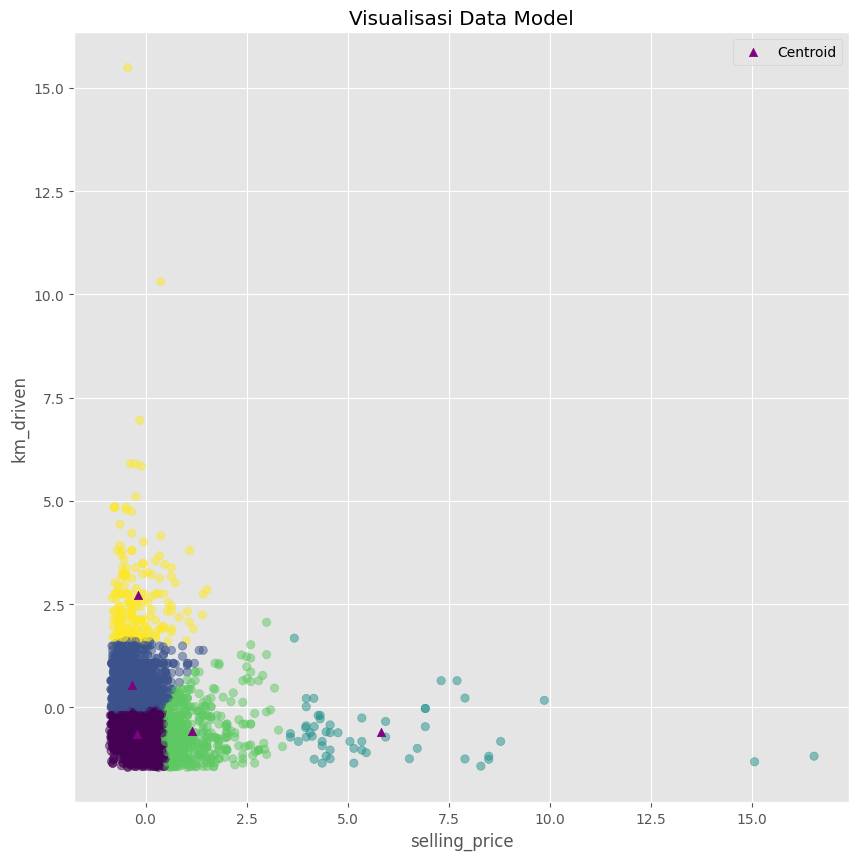

In [254]:
# Visualisasi Cluster
plt.figure(figsize = (10, 10))

# Titik-titik data x dan y tiap cluster
plt.scatter(xs, ys, alpha = 0.5, c = labels)

# Titik-titik centroid
plt.scatter(centroids_x, centroids_y, label = "Centroid", marker = "^", color = "purple")

# Beri Label 
plt.title("Visualisasi Data Model")
plt.xlabel("selling_price")
plt.ylabel("km_driven")

plt.legend()
plt.show()

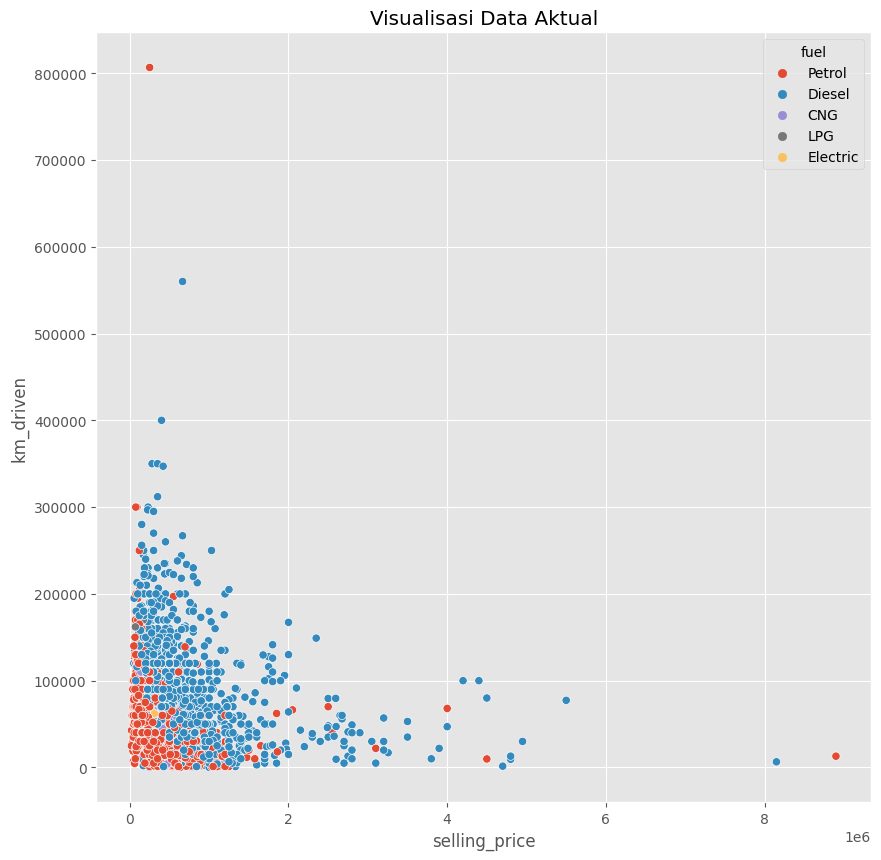

In [255]:
from matplotlib.pyplot import title


plt.figure(figsize = (10, 10))
df_aktual = df[['selling_price', 
                'km_driven', 
                'fuel']]
sns.scatterplot(
    x = 'selling_price', 
    y = 'km_driven',
    data = df_aktual,
    hue = 'fuel')
plt.title("Visualisasi Data Aktual")
plt.show()